# OSMSatLab Interactive Testing

This notebook allows you to interactively test the functionality of the `osmsatlab` package.

In [11]:
def workflow(osm_lab):

    for category in ['healthcare', 'education_early', 'education_school', 'education_higher', 'food', 'emergency', 'green_space', 'public_transport']:
        # Calculate metrics for each network type
        results_eucl = osm_lab.calculate_accessibility_metrics(service_category=category, threshold=1000, metric_type='euclidean')
        results_drive = osm_lab.calculate_accessibility_metrics(service_category=category, threshold=5, metric_type='drive')
        results_walk = osm_lab.calculate_accessibility_metrics(service_category=category, threshold=10, metric_type='walk')
        
        # Extract stats for easier access
        stat_e = results_eucl['coverage_stats']
        stat_d = results_drive['coverage_stats']
        stat_w = results_walk['coverage_stats']

        print('-------------------------------------------------------------------------')
        print(f"CATEGORY: {category.upper()}")
        print(f"Euclidean (1km):  {stat_e['coverage_ratio']:.2%} coverage ({stat_e['covered_population']:,} people)")
        print(f"Driving (10min):  {stat_d['coverage_ratio']:.2%} coverage ({stat_d['covered_population']:,} people)")
        print(f"Walking (20min):  {stat_w['coverage_ratio']:.2%} coverage ({stat_w['covered_population']:,} people)")

        results = osm_lab.calculate_per_capita_metrics(service_category=category)
        print('--------------------------------------------')
        print(f"services_per_1000 (category {category}): {results['services_per_1000']}")
        print(f"people_per_service (category {category}): {results['people_per_service']}")
        print('------------------------------------------------------------------------------------------------------------')

In [12]:
from osmsatlab.core import OSMSatLab
import matplotlib.pyplot as plt

#Create OSMSatLab object for bounding box and extract accessibility and per-capita metrics.
bbox_enschede = (6.7470, 52.1610, 7.0460, 52.3210)
bbox_bogota_residential = (-74.1255, 4.7195, -74.0825, 4.7565)
bbox_amsterdam_residential = (4.8855, 52.3445, 4.9185, 52.3645)
bbox_usaquen = (-74.0870, 4.6760, -73.9970, 4.8360)

osm_lab = OSMSatLab(bbox = bbox_bogota_residential)

workflow(osm_lab)

Loading population (2020):   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
Loading population (2020): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


C:\Users\darey/.cache/osmsatlab/worldpop\col_ppp_2020_1km_Aggregated.tif


Fetching services: 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]


Network 'drive' not found in cache. Downloading from OSM...
Network 'walk' not found in cache. Downloading from OSM...
-------------------------------------------------------------------------
CATEGORY: HEALTHCARE
Euclidean (1km):  90.28% coverage (416,056.40625 people)
Driving (10min):  100.00% coverage (460,869.9375 people)
Walking (20min):  100.00% coverage (460,869.9375 people)
--------------------------------------------
services_per_1000 (category healthcare): 0.14320743083953857
people_per_service (category healthcare): 6982.8779296875
------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------
CATEGORY: EDUCATION_EARLY
Euclidean (1km):  62.19% coverage (286,604.5625 people)
Driving (10min):  100.00% coverage (460,869.9375 people)
Walking (20min):  100.00% coverage (460,869.9375 people)
--------------------------------------------
services_per_1000 (category

In [13]:
#Create OSMSatLab object for custom geometry and extract accessibility and per-capita metrics.
osm_lab = OSMSatLab(custom_geometry='soacha.geojson')

workflow(osm_lab)

Loading population (2020):   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
Loading population (2020): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


C:\Users\darey/.cache/osmsatlab/worldpop\col_ppp_2020_1km_Aggregated.tif


Fetching services: 100%|██████████| 8/8 [00:00<00:00,  8.43it/s]


Network 'drive' not found in cache. Downloading from OSM...
Network 'walk' not found in cache. Downloading from OSM...
-------------------------------------------------------------------------
CATEGORY: HEALTHCARE
Euclidean (1km):  57.34% coverage (298,555.15625 people)
Driving (10min):  87.09% coverage (453,420.625 people)
Walking (20min):  97.94% coverage (509,898.96875 people)
--------------------------------------------
services_per_1000 (category healthcare): 0.04417702928185463
people_per_service (category healthcare): 22636.19921875
------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------
CATEGORY: EDUCATION_EARLY
Euclidean (1km):  34.90% coverage (181,722.390625 people)
Driving (10min):  76.45% coverage (398,040.75 people)
Walking (20min):  94.53% coverage (492,179.5 people)
--------------------------------------------
services_per_1000 (category educati

In [10]:
# Example of getting OSM services within the healthcare category
osm_lab.services['healthcare'].head()

geometry   amenity  \
element id                                                      
node    992177305    POINT (-8261914.465 510261.22)  pharmacy   
        992177987   POINT (-8262049.429 510187.167)  pharmacy   
        992178647    POINT (-8262219.603 510162.71)  hospital   
        1012559871  POINT (-8260986.127 510773.401)  pharmacy   
        4108834829  POINT (-8259552.889 511878.817)  pharmacy   

                                         name healthcare  \
element id                                                 
node    992177305                       super        NaN   
        992177987                       Droxi        NaN   
        992178647   Centro Medico Cruz Blanca   hospital   
        1012559871                     Aldaza        NaN   
        4108834829   Hiperdrogueria Kamifarma        NaN   

                                             addr:street addr:housenumber  \
element id                                                                  
node    992177305                                    NaN              NaN   
        992177987                                    NaN              NaN   
        992178647                                    NaN              NaN   
        1012559871                                   NaN              NaN   
        4108834829  Avenida León XIII Carrera 9 N° 42-12              NaN   

                   addr:postcode email name:en opening_hours  ... wikidata  \
element id                                                    ...            
node    992177305            NaN   NaN     NaN           NaN  ...      NaN   
        992177987            NaN   NaN     NaN           NaN  ...      NaN   
        992178647            NaN   NaN     NaN           NaN  ...      NaN   
        1012559871           NaN   NaN     NaN           NaN  ...      NaN   
        4108834829           NaN   NaN     NaN           NaN  ...      NaN   

                   wikimedia_commons wikipedia addr:city barrier construction  \
element id                                                                      
node    992177305                NaN       NaN       NaN     NaN          NaN   
        992177987                NaN       NaN       NaN     NaN          NaN   
        992178647                NaN       NaN       NaN     NaN          NaN   
        1012559871               NaN       NaN       NaN     NaN          NaN   
        4108834829               NaN       NaN       NaN     NaN          NaN   

                   description operator:type website building  
element id                                                     
node    992177305          NaN           NaN     NaN      NaN  
        992177987          NaN           NaN     NaN      NaN  
        992178647          NaN           NaN     NaN      NaN  
        1012559871         NaN           NaN     NaN      NaN  
        4108834829         NaN           NaN     NaN      NaN  

[5 rows x 23 columns]

<Axes: >

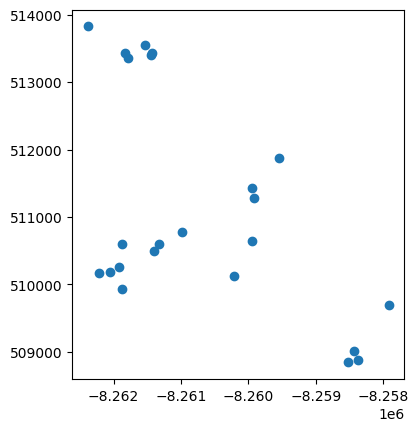

In [11]:
#Example, plot the healthcare services
osm_lab.services['healthcare'].plot()

In [12]:
# Example of getting population data
osm_lab.population.head()

,population,geometry
0,10965.644531,POINT (-8262364.49 513970.143)
1,6753.814941,POINT (-8263292.153 513039.473)
2,10495.756836,POINT (-8262364.49 513039.473)
3,9692.815430,POINT (-8261436.828 513039.473)
4,3495.458496,POINT (-8264219.815 512108.813)


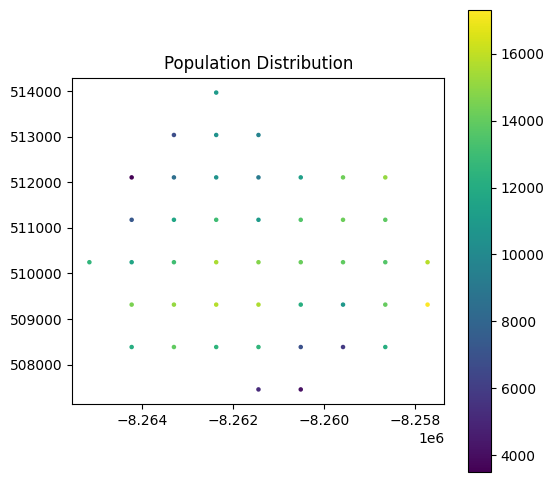

In [13]:
# Exmple, plot the population distribution from the population geodataframe
fig, ax = plt.subplots(figsize=(6, 6))
osm_lab.population.plot(column='population', ax=ax, legend=True, markersize=5)
plt.title("Population Distribution")
plt.show()

In [14]:
#Example of getting the bbox or path of the custom geosjon
print(osm_lab.bbox)
print(osm_lab.custom_geometry)

None
soacha.geojson
